#  Exploring the P300 in EEG Data

I this notebook I explore how salient auditory stimuli evoke the P300 component in EEG using the MNE Sample Dataset for my BHS 2025 project.

## 1. Dataset Loading and Data Preprocessing

Opening raw data file /home/fojeda/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


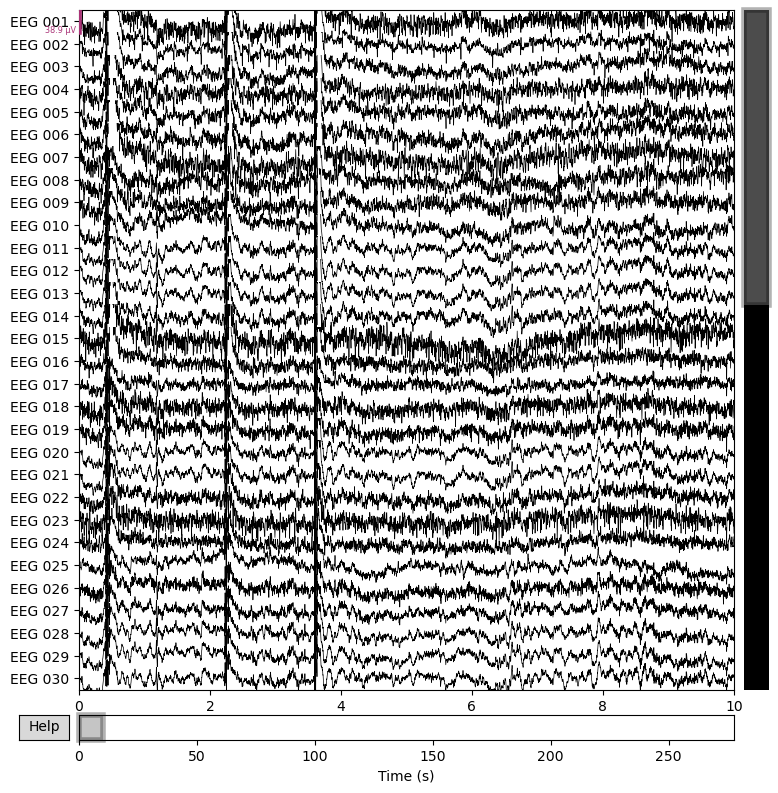

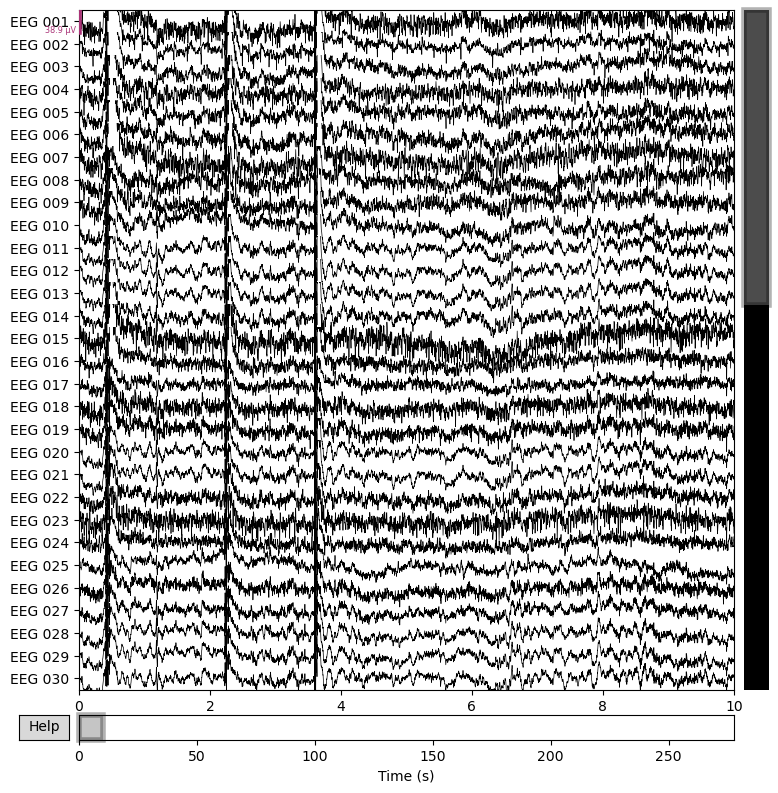

In [12]:
from mne.datasets import sample
from mne import io
import mne

data_path = sample.data_path()
raw_file = data_path / 'MEG' / 'sample' / 'sample_audvis_raw.fif'
raw = io.read_raw_fif(raw_file, preload=True)

raw.pick_types(meg=False, eeg=True, stim=True, eog=True)

raw.plot(n_channels=30, scalings='auto')

In [13]:
raw.filter(1., 40., fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1983 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


<Raw | sample_audvis_raw.fif, 69 x 166800 (277.7 s), ~90.8 MiB, data loaded>

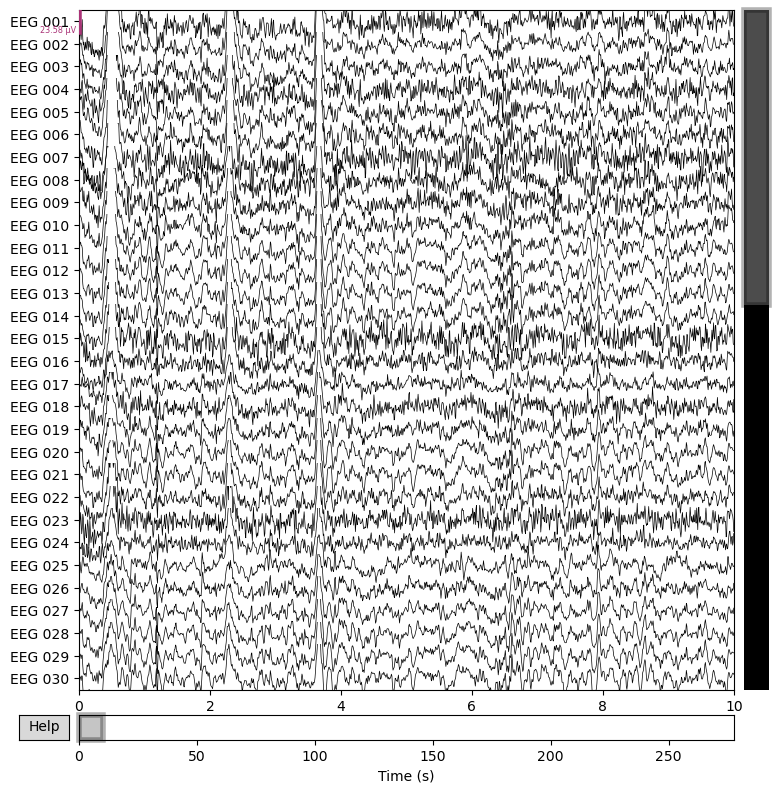

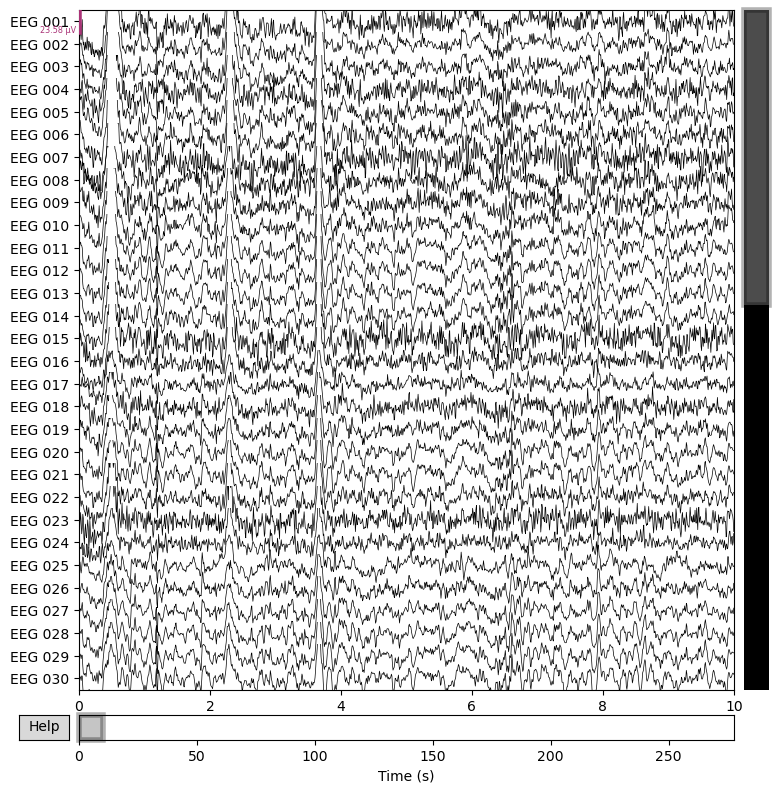

In [14]:
raw.plot(n_channels=30, scalings='auto')

In [15]:
raw.set_montage('standard_1020', on_missing='ignore')

<Raw | sample_audvis_raw.fif, 69 x 166800 (277.7 s), ~90.7 MiB, data loaded>

## 2. Events Detection and Epochs Creation

Opening raw data file /home/fojeda/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1983 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
88 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 88 events and 601 original time points ...
0 bad epochs dropped


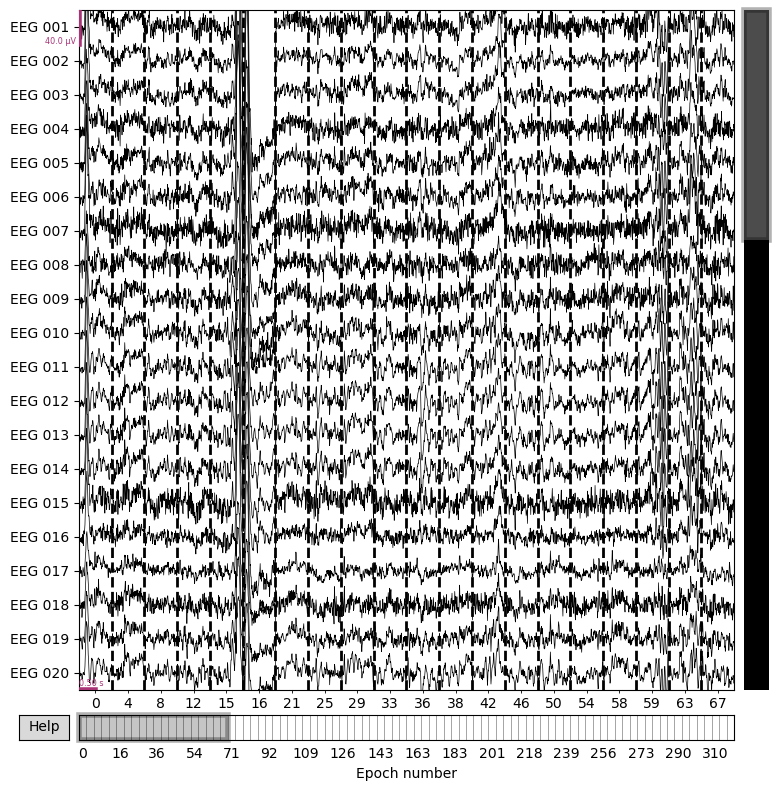

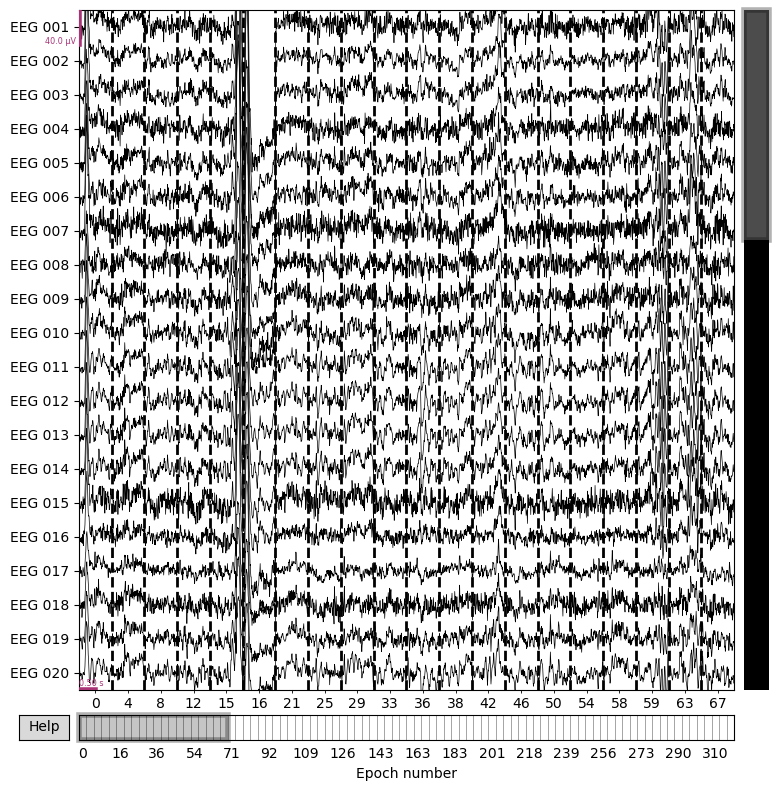

In [16]:
raw = mne.io.read_raw_fif(raw_file, preload=True)
raw.pick_types(meg=False, eeg=True, stim=True, eog=True)
raw.filter(1., 40., fir_design='firwin')
raw.set_montage('standard_1020', on_missing='ignore')

events = mne.find_events(raw, stim_channel='STI 014')
event_id = {'standard': 2, 'deviant': 5}

epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.8,
                    baseline=(None, 0), preload=True)

epochs.plot()

In [19]:
evoked_standard = epochs['standard'].average()
evoked_deviant = epochs['deviant'].average()

## 3. Computation and ERPs Visualization

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


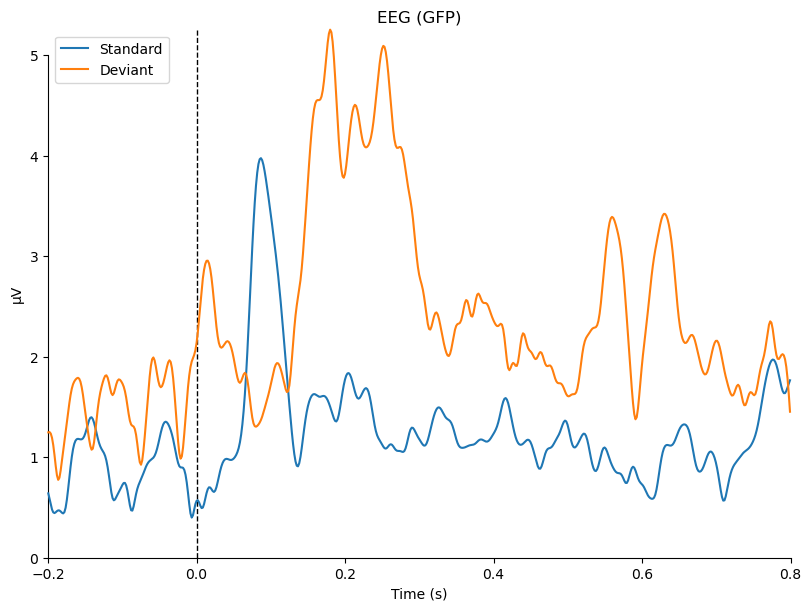

In [25]:
figs = mne.viz.plot_compare_evokeds(
    {'Standard': evoked_standard, 'Deviant': evoked_deviant},
    picks='eeg'
)

# Save the first figure in the list
figs[0].savefig('figures/erp_comparison.png', dpi=300)

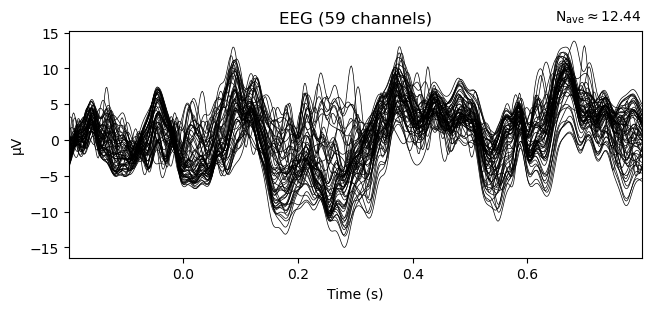

In [22]:
difference = mne.combine_evoked([evoked_deviant, evoked_standard], weights=[1, -1])

import matplotlib.pyplot as plt
fig = difference.plot()
plt.suptitle("Difference Wave (Deviant - Standard)", fontsize=14)

fig.savefig('figures/difference_wave.png', dpi=300)

## 4. Interpretion

The ERP waveforms for the “Standard” (frequent right auditory tone) and “Deviant” (rare visual face stimulus) conditions show clear, time-locked responses. Most notably, the deviant condition elicited a strong **P300 component**, with a positive deflection peaking around 300 milliseconds after stimulus onset.

This pattern aligns with expectations from the oddball paradigm: **rare, salient stimuli** — even when emotionally neutral — reliably trigger greater attentional and evaluative brain responses. The clear difference between conditions confirms the effectiveness of using event ID 5 (visual face) as a deviant in this dataset.

Although topographic mapping was not feasible due to generic channel naming in the sample data, the ERP waveforms and the computed difference wave still demonstrate core cognitive dynamics underlying the P300.

This project lays a solid foundation for extending this work to emotionally salient or affectively modulated stimuli in future experiments.
